In [86]:
greetings = "Assalam-o-Alaikum!"
print(greetings)

Assalam-o-Alaikum!


### Import Dataset

In [87]:
from sklearn.datasets import load_breast_cancer

### Import Libraries

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

### KNeighboursClassifier

In [89]:
# data
df = load_breast_cancer()

In [90]:
# breast cancer data
data = df["data"].reshape(-1, 1)
data = pd.DataFrame(data)
data.columns = ["Data"]
data.head()

,Data
0,17.9900
1,10.3800
2,122.8000
3,1001.0000
4,0.1184


In [91]:
# cancer detection
target = df["target"].reshape(-1, 1)
target = pd.DataFrame(target)
target.columns = ["Target"]
target.head()

,Target
0,0
1,0
2,0
3,0
4,0


In [92]:
t = target["Target"].replace([0, 1], ["benign", "malignant"])

### Train Test Split

In [93]:
x_train, x_test, y_train, y_test = train_test_split(df.data, t, test_size = 0.75, random_state = 3)

### Find Best K Value

In [94]:
from sklearn.metrics import accuracy_score

In [95]:
k_score = []
for n in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(x_train, y_train)
    yhat = knn.predict(x_test)
    accuracy = accuracy_score(y_test, yhat)
    k_score.append(accuracy)
k_score[0:6]

[0.9180327868852459,
 0.9156908665105387,
 0.9297423887587822,
 0.936768149882904,
 0.9250585480093677,
 0.9484777517564403]

In [96]:
best_k = k_score.index(max(k_score))
print("Best K index = " + str(best_k))
print("Best K Accuracy = " + str(k_score[best_k]))

Best K index = 5
Best K Accuracy = 0.9484777517564403


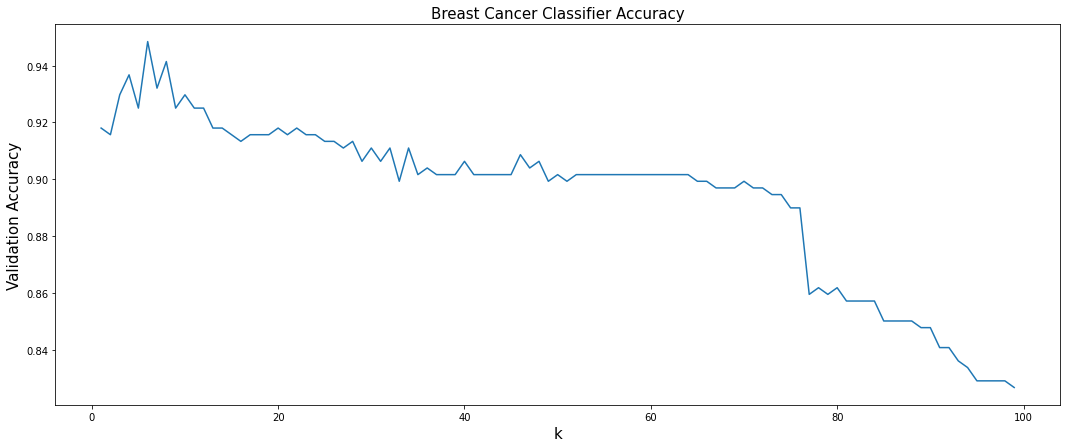

In [97]:
k_list = range(1, 100)
plt.figure(figsize = (18, 7))
plt.plot(k_list, k_array)
plt.xlabel("k", size = 15)
plt.ylabel("Validation Accuracy", size = 15)
plt.title("Breast Cancer Classifier Accuracy", size = 15)
plt.show()

In [98]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
yhat = knn.predict(x_test)
yhat[0:5]

array(['malignant', 'malignant', 'malignant', 'malignant', 'benign'],
      dtype=object)

In [99]:
# Predicted and Actual Values
comparison = pd.DataFrame({"Actual": y_test, "Predicted": yhat})
comparison

,Actual,Predicted
266,malignant,malignant
448,malignant,malignant
420,malignant,malignant
493,malignant,malignant
321,benign,benign
...,...,...
428,malignant,malignant
487,benign,benign
467,malignant,malignant
39,benign,malignant
